### 4.10 Part 1.25 Young Basic Consumer
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Loyalty Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','000YBC.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag',
       'AgeIncome_flag'],
      dtype='object')

In [5]:
df.shape

(11175292, 31)

In [6]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,1.117529e+07,1.117529e+07,1.117529e+07,1.117529e+07,1.117529e+07,1.117529e+07
mean,1.030932e+05,2.899119e+01,6.976373e+04,2.543764e+04,1.787195e+01,1.103369e+01
std,5.962492e+04,6.635304e+00,2.027774e+04,1.417272e+04,1.764723e+01,8.018414e+01
min,1.000000e+00,1.800000e+01,2.590300e+04,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.114900e+04,2.300000e+01,5.621500e+04,1.325100e+04,5.000000e+00,7.395140e+00
50%,1.031350e+05,2.900000e+01,6.900800e+04,2.507200e+04,1.200000e+01,7.821250e+00
75%,1.549830e+05,3.500000e+01,8.444400e+04,3.776600e+04,2.500000e+01,8.237608e+00
max,2.062060e+05,4.000000e+01,1.987280e+05,4.968800e+04,1.000000e+02,1.020999e+04


### 3 -Analyzing Young  Basic  Consumer by Loyalty Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','fam_status','loyalty_flag']]

In [8]:
df11=df1.drop_duplicates().reset_index()

In [9]:
df11

,index,user_id,fam_status,loyalty_flag
0,8,33890,single,Regular customer
1,25,65803,married,New customer
2,50,125935,single,Regular customer
3,95,130797,married,Regular customer
4,164,152052,single,Regular customer
...,...,...,...,...
58026,10895587,125626,married,New customer
58027,10900242,153361,married,New customer
58028,10902041,93084,married,New customer
58029,10902198,86902,married,New customer


#### -analyzing Young Basic  Consumer by Loyalty Flag and Family Status

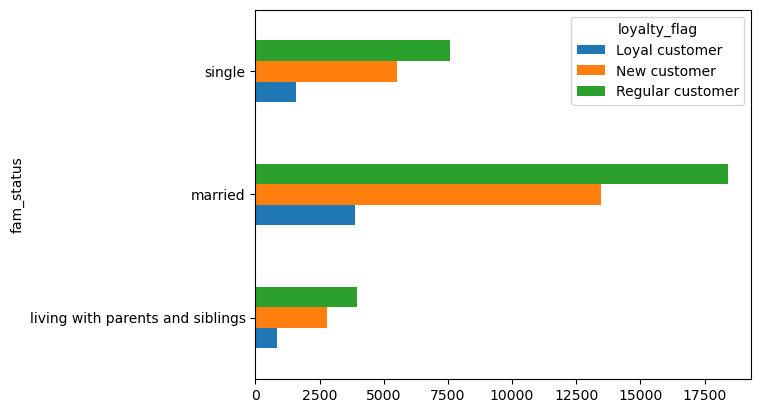

In [10]:
bar12=df11.groupby('fam_status')['loyalty_flag'].value_counts().unstack().plot.barh()

In [11]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'YBC_LoyaltyFlag.png'))

### 4 -analyzing Young Basic  Consumer purshases by their income

In [12]:
df2=df[['prices', 'income']]

In [13]:
df2['prices'].sum()

122638739.39999992

In [14]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [15]:
df22

,mean_purshase
income,
25903,3.214286
25911,6.444828
25937,6.807500
25941,5.500000
25955,6.889567
...,...
196254,1435.836429
196646,129.477236
196721,991.012088


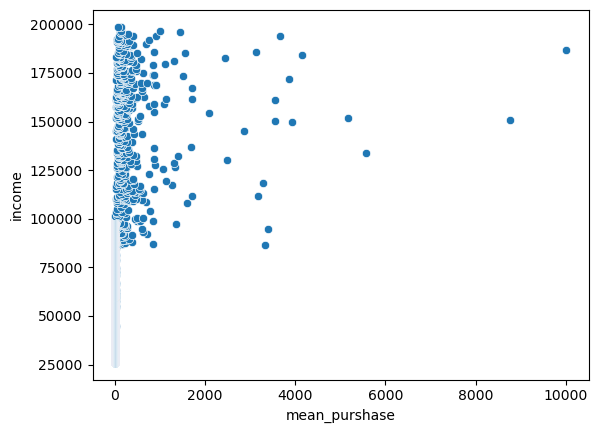

In [16]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [17]:
df22filtered=df22[df22['mean_purshase']<2000]

In [18]:
df22filtered.describe()

,mean_purshase
count,39624.000000
mean,10.580307
std,43.409941
min,1.609091
25%,7.183731
50%,7.737646
75%,8.173933
max,1703.345763


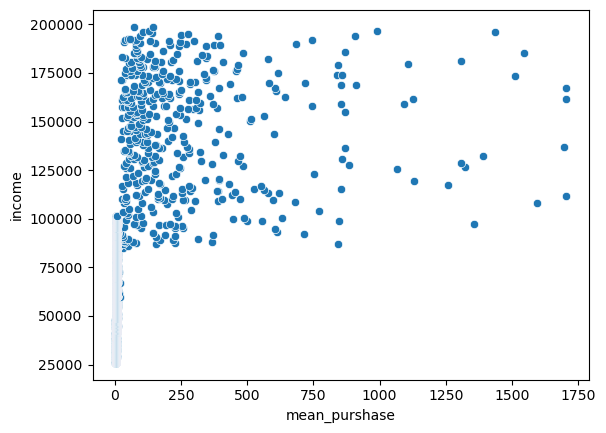

In [19]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [20]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'YBC_PricesIncome.png'))

### 5 - Analyzing Young Basic  Consumer by Busiest_day

In [21]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [22]:
df4

,user_id,STATE,busiest_day,day_of_week
8,33890,New Mexico,Busiest days,1
9,33890,New Mexico,Regularly days,6
10,33890,New Mexico,Regularly days,6
11,33890,New Mexico,Regularly days,6
12,33890,New Mexico,Regularly days,6
...,...,...,...,...
10907400,41926,Arkansas,Regularly days,5
10907401,41926,Arkansas,Slowest days,3
10907404,53943,Minnesota,Busiest days,1
10907406,66119,Nevada,Regularly days,6


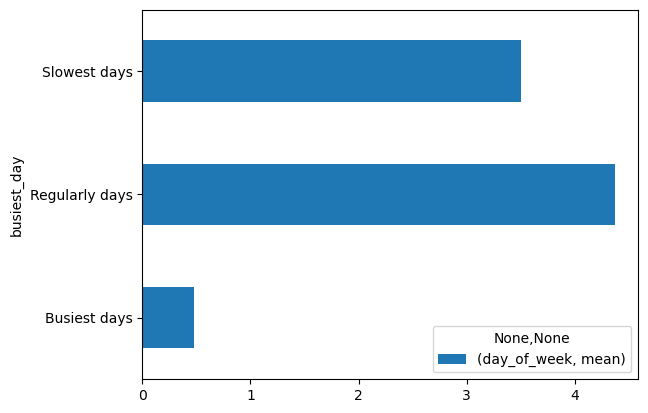

In [23]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [24]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'YBC_BusiestDayOfWeek.png'))

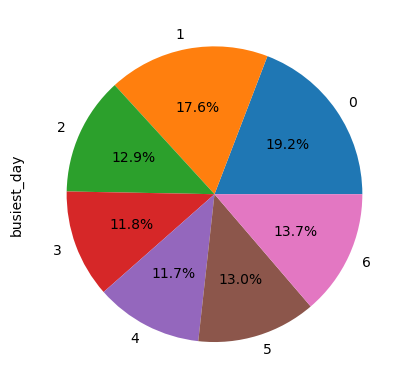

In [25]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [26]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    2142541
1    1969227
2    1442951
3    1318722
4    1312203
5    1456231
6    1533417
Name: busiest_day, dtype: int64

In [27]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'YBC_pieBusiestDayOfWeek.png'))

#### -prefered hour of day

In [28]:
df44=df[['order_hour_of_day','user_id']]

In [29]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      77740
1      40822
2      24675
3      18151
4      18480
5      30278
6     103467
7     309266
8     593472
9     852178
10    959212
11    947201
12    900748
13    918421
14    928615
15    921163
16    870581
17    710904
18    553571
19    427550
20    333690
21    275127
22    222911
23    137069
Name: user_id, dtype: int64

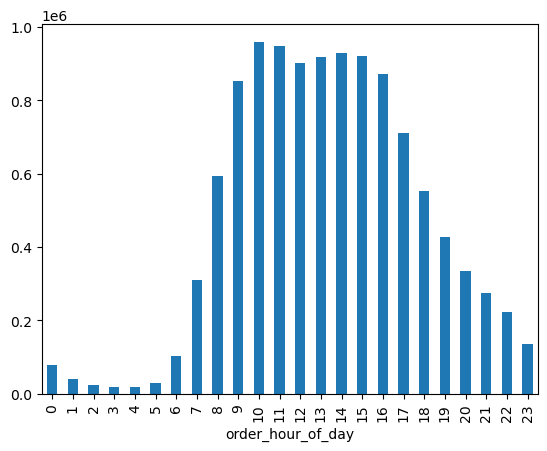

In [30]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [31]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'YBC_BusiestHourOfDay.png'))

### 6 - Analyzing number of Young  Basic  Consumers by State

In [32]:
df5=df[['user_id','STATE']]

In [33]:
DF5=df5.drop_duplicates().reset_index()

In [34]:
DF5

,index,user_id,STATE
0,8,33890,New Mexico
1,25,65803,Idaho
2,50,125935,Iowa
3,95,130797,Maryland
4,164,152052,Montana
...,...,...,...
58026,10895587,125626,Idaho
58027,10900242,153361,Arkansas
58028,10902041,93084,District of Columbia
58029,10902198,86902,West Virginia


#### number of rows indicate total number of YBC =58,031

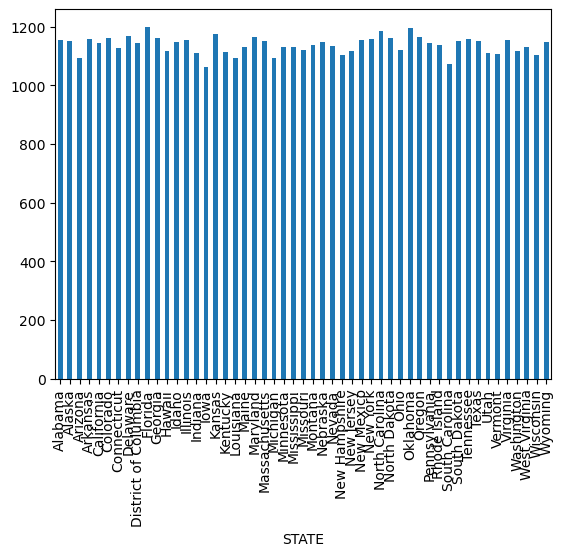

In [35]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

#### -defining 10 Top States

In [36]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
Florida           1200
Oklahoma          1195
North Carolina    1184
Kansas            1175
Delaware          1168
Oregon            1164
Maryland          1164
Georgia           1162
North Dakota      1162
Colorado          1160
Name: user_id, dtype: int64

#### -saving the plot

In [37]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'YBC_UsersNumberState.png'))

### 7 - Analyzing Young  Basic  Consumer  by n_dependants

In [38]:
df6=df[['user_id', 'n_dependants']]

In [39]:
DF6=df6.drop_duplicates()

In [40]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    14689
1    14417
2    14563
3    14362
Name: user_id, dtype: int64

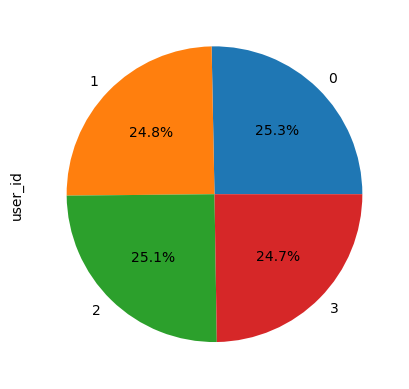

In [41]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [42]:
DF6

,user_id,n_dependants
8,33890,0
25,65803,2
50,125935,0
95,130797,1
164,152052,0
...,...,...
10895587,125626,3
10900242,153361,3
10902041,93084,1
10902198,86902,3


#### saving the plot

In [43]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'YBC_NDependansUsers.png'))

### 8 - Analyzing Days since prior order

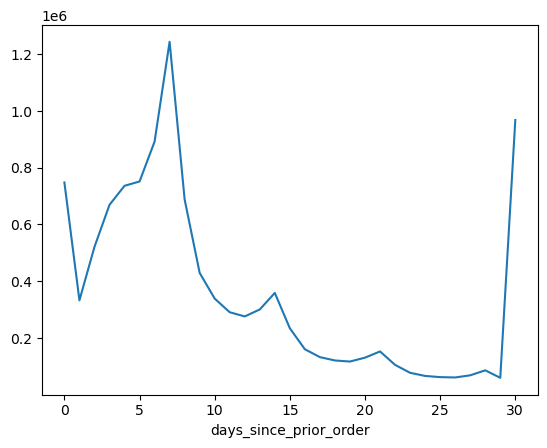

In [44]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [45]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0      747941
1      332568
2      520700
3      668880
4      736031
5      751260
6      891614
7     1243392
8      687836
9      429218
10     338691
11     290635
12     275887
13     300495
14     358690
15     234116
16     160242
17     132471
18     120725
19     116980
20     130618
21     152562
22     105234
23      77319
24      66243
25      62054
26      60888
27      68475
28      85985
29      59762
30     967780
Name: days_since_prior_order, dtype: int64

In [46]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'YBC_DaysSincePriorOrder.png'))

### 9- Defining TOP products for client group


 #### creating subset

In [47]:
df18=df[['product_name','product_id','prices']]

In [48]:
df18

,product_name,product_id,prices
8,Key Limes,8953,12.3
9,Organic Green Beans,15200,12.8
10,Organic Black Beans,27156,6.1
11,Avocado Oil,31912,12.1
12,Soda,196,9.0
...,...,...,...
10907400,Vegetable Oil,22128,1.6
10907401,Seedless Cucumbers,30827,7.2
10907404,Organic Baby Spinach,21903,8.2
10907406,24/7 Performance Light Weight Cat Litter,15175,12.2


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [49]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(11)

In [50]:
DF18

,product_name,prices
0,Banana,163293
1,Bag of Organic Bananas,131011
2,Organic Strawberries,92398
3,Organic Baby Spinach,83590
4,Organic Hass Avocado,73723
5,,68379
6,Organic Avocado,61266
7,Large Lemon,52581
8,Strawberries,48730
9,Organic Whole Milk,48554


In [51]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [52]:
DF18=DF18.drop(index=5)

#### -creating plot

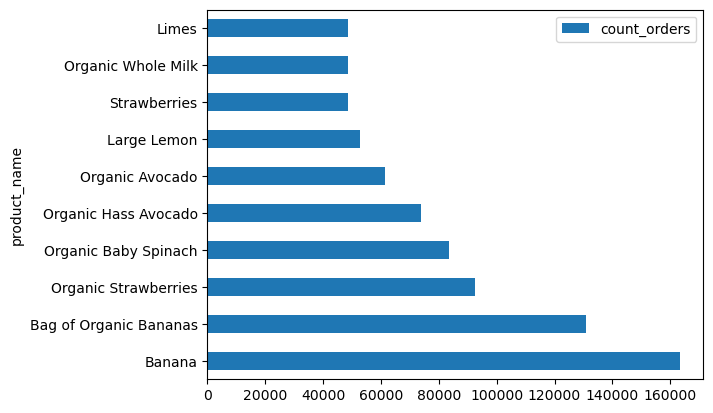

In [53]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [55]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'YBC_Products.png'))